In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

In [3]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [4]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for c in C:
  svm = SVC(kernel='rbf',C=c)
  svm.fit(x_train_scaled,y_train)
  train_pred = svm.predict(x_train_scaled)
  test_pred = svm.predict(x_test_scaled)
  training_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_test,test_pred)
  num_sv = svm.n_support_.sum()
  scores.append([c,training_accuracy,test_accuracy,num_sv])



In [5]:
results_df = pd.DataFrame(scores,columns=["C","Training accuracy","Testing accuracy","num of support vectors"])
results_df

,C,Training accuracy,Testing accuracy,num of support vectors
0,0.001,0.628571,0.622807,338
1,0.010,0.628571,0.622807,342
2,0.100,0.956044,0.947368,202
3,1.000,0.989011,0.982456,104
4,10.000,0.993407,0.973684,76
5,100.000,1.000000,0.938596,65
6,1000.000,1.000000,0.938596,65


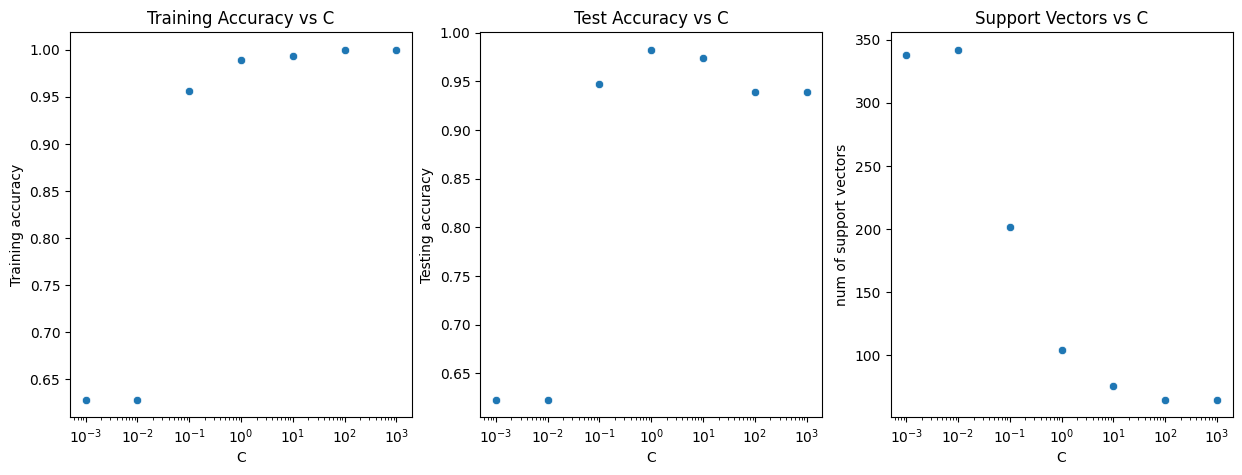

In [9]:
fig , axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.scatterplot(x="C",y="Training accuracy",data = results_df,ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_title("Training Accuracy vs C")
sns.scatterplot(x="C",y="Testing accuracy",data = results_df,ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_title("Test Accuracy vs C")
sns.scatterplot(x="C",y="num of support vectors",data = results_df,ax=axes[2])
axes[2].set_xscale("log")
axes[2].set_title("Support Vectors vs C")
plt.show()

In [10]:
results_df

,C,Training accuracy,Testing accuracy,num of support vectors
0,0.001,0.628571,0.622807,338
1,0.010,0.628571,0.622807,342
2,0.100,0.956044,0.947368,202
3,1.000,0.989011,0.982456,104
4,10.000,0.993407,0.973684,76
5,100.000,1.000000,0.938596,65
6,1000.000,1.000000,0.938596,65


# Analyzing Bias - Variance trade off
Based on the experimental results, it is clearly observed that the SVM model exhibits a typical bias–variance tradeoff as the regularization parameter C is varied. For very small values of C (0.001 and 0.01), both training and testing accuracies remain very low, while the number of support vectors is extremely high, indicating underfitting due to high bias. In this region, the model is overly regularized and fails to capture the underlying patterns in the data. As C increases to moderate values (0.1 and 1), there is a significant improvement in both training and testing accuracies, along with a balanced number of support vectors. Among these, C = 1 achieves the highest test accuracy with a minimal gap between training and testing performance, demonstrating the best balance between bias and variance. For very large values of C (100 and 1000), the training accuracy reaches 100%, but the testing accuracy decreases and the number of support vectors becomes very small, which indicates overfitting due to high variance. Therefore, based on this analysis, C = 1 is the optimal regularization parameter, as it provides the best generalization performance while avoiding both underfitting and overfitting.